### Implementation of Machine Learning in the field of Medical Diagnosis using a Heart Failure Prediction Model.


Data Availability

The data and features required for this model were sourced from Kaggle. (https://www.kaggle.com/fedesoriano/heart-failure-prediction)

The features present in this data are as follows:

-Age
~Sex
~ChestPainType
~RestingBP
~Cholesterol
~FastingBS
~RestingECG
~MaxHR
~ExcerciseAngina
~Oldpeak
~ST_Slope
~HeartDisease



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv(r'C:\\Users\\shhimel\\Desktop\\heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB



#### Data Pre-Processing

Data Preprocessing includes the steps we need to follow to transform or encode data so that it may be easily parsed by the machine.

The main agenda for a model to be accurate and precise in predictions is that the algorithm should be able to easily interpret the data's features.



#### LABEL ENCODING

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.


In [3]:
le = LabelEncoder()
label_Sex = le.fit_transform(df["Sex"])
label_ChestPainType = le.fit_transform(df["ChestPainType"])
label_RestingECG = le.fit_transform(df["RestingECG"])
label_ExerciseAngina = le.fit_transform(df["ExerciseAngina"])
label_STSlope = le.fit_transform(df["ST_Slope"])

In [4]:
le.classes_

array(['Down', 'Flat', 'Up'], dtype=object)

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
data = df.drop("Sex", axis='columns')
data["Sex"] = label_Sex 
data.head(5)

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,1


In [7]:
data = data.drop("ChestPainType", axis='columns')
data["ChestPainType"] = label_ChestPainType

In [8]:
data = data.drop("RestingECG", axis='columns')
data["RestingECG"] = label_RestingECG

In [9]:
data = data.drop("ExerciseAngina", axis='columns')
data["ExerciseAngina"] = label_RestingECG

In [10]:
data = data.drop("ST_Slope", axis='columns')
data["ST_Slope"] = label_STSlope

In [11]:
data = data[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']]
data.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,40,140,289,0,172,0.0,1,1,1,1,2,0
1,49,160,180,0,156,1.0,0,2,1,1,1,1
2,37,130,283,0,98,0.0,1,1,2,2,2,0
3,48,138,214,0,108,1.5,0,0,1,1,1,1
4,54,150,195,0,122,0.0,1,2,1,1,2,0



#### TRAIN_TEST DATA SPLIT

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.The process involves splitting the dataset into a training set (to train the model) and a test set (to evaluate the model performance).


In [12]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
x = data[["Age", "RestingBP", "Cholesterol", "FastingBS","MaxHR","Oldpeak","Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope",]]
y = data["HeartDisease"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state =5)

### DIFFERENT MACHINE LEARNING MODELS AND THEIR RESPECTIVE ACCURACY

#### LOGISTIC REGRESSION

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(x_train, y_train)

In [15]:
model.score(x_test, y_test)*100

90.21739130434783

[[67  6]
 [12 99]]


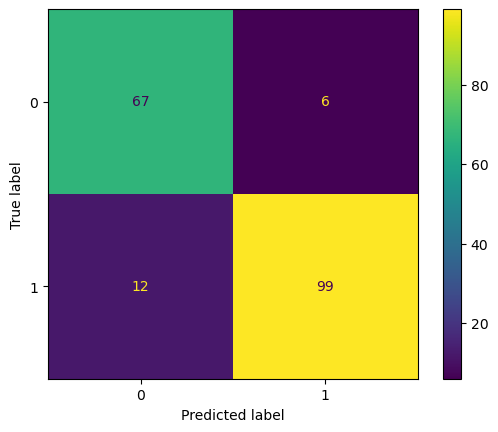

In [16]:
y_pred = model.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels = model.classes_)
disp.plot()
plt.show()

#### DECISION TREE

In [17]:
from sklearn import tree 
model_2 = tree.DecisionTreeClassifier(max_depth=16)
model_2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=16)

In [18]:
model_2.score(x_test, y_test)*100

77.17391304347827

[[55 18]
 [24 87]]


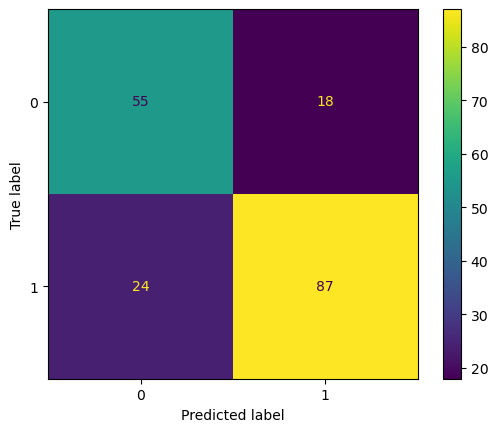

In [19]:
y_pred = model_2.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels = model_2.classes_)
disp.plot()
plt.show()

#### RANDOM FOREST

In [20]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier(n_estimators=99, max_depth=16, random_state=42)
model_3.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=99, random_state=42)

In [21]:
model_3.score(x_test,y_test)*100

88.58695652173914

[[64  9]
 [12 99]]


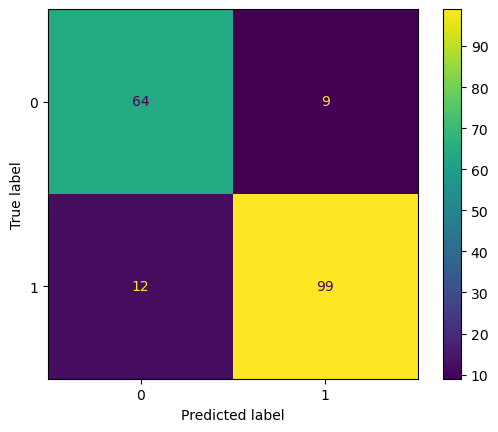

In [22]:
y_pred = model_3.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
disp = ConfusionMatrixDisplay(cf_matrix, display_labels = model_3.classes_)
disp.plot()
plt.show()



In summary, out of the 3 models we tested, we find the most accurate results with our 1st model (Logistic Regression).

We can also improve on our existing model by implementing methods of data engineering and feature selection during the pre-processing stage. Using neural networks should improve the accuracy and precision of the predictions.
